### VD B.1:

In [128]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50,2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

# extended data by adding a column of 1s (x_0 = 1)
X = np.concatenate((np.ones((1, X.shape[1])), X), axis = 0)

In [131]:
X

array([[1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ],
       [0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 1.75, 2.  , 2.25, 2.5 , 2.75,
        3.  , 3.25, 3.5 , 4.  , 4.25, 4.5 , 4.75, 5.  , 5.5 ]])

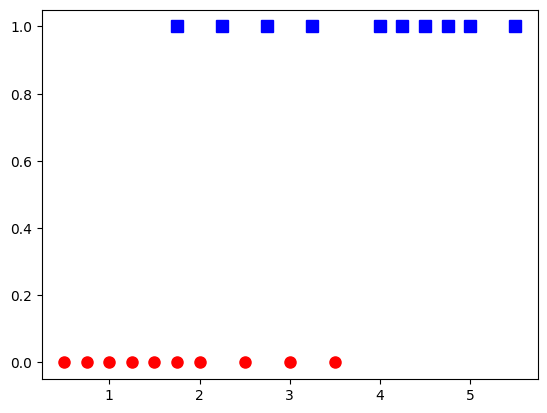

In [135]:
X0 = X[1, np.where(y == 0)][0]
y0 = y[np.where(y == 0)]
X1 = X[1, np.where(y == 1)][0]
y1 = y[np.where(y == 1)]

plt.plot(X0, y0, 'ro', markersize = 8)
plt.plot(X1, y1, 'bs', markersize = 8)
plt.show()

In [139]:
def sigmoid(s):
    return 1/(1 + np.exp(-s))

def logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_count = 10000):
    w = [w_init]
    N = X.shape[1]
    d = X.shape[0]
    count = 0
    check_w_after = 20
    # loop of stochastic gradient descent
    while count < max_count:
        # shuffle the order of data (for stochastic gradient descent).
        # and put into mix_id
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = y[i]
            zi = sigmoid(np.dot(w[-1].T, xi))
            w_new = w[-1] + eta*(yi - zi)*xi
            count += 1
            # stopping criteria
            if count % check_w_after == 0:
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    return w
            w.append(w_new)
    return w

In [140]:
eta = .05
d = X.shape[0]
np.random.seed(1)
w_init = np.random.randn(d, 1)

w = logistic_sigmoid_regression(X, y, w_init, eta)
print(w[-1])

[[-4.14756984]
 [ 1.4545261 ]]


In [141]:
print(sigmoid(np.dot(w[-1].T, X)))

[[0.03166682 0.04493016 0.06338508 0.08871617 0.12284281 0.16768145
  0.16768145 0.22469412 0.29423862 0.37489947 0.46316111 0.55379311
  0.64098456 0.71976001 0.84164708 0.88433789 0.91665921 0.94055559
  0.95791472 0.97921101]]


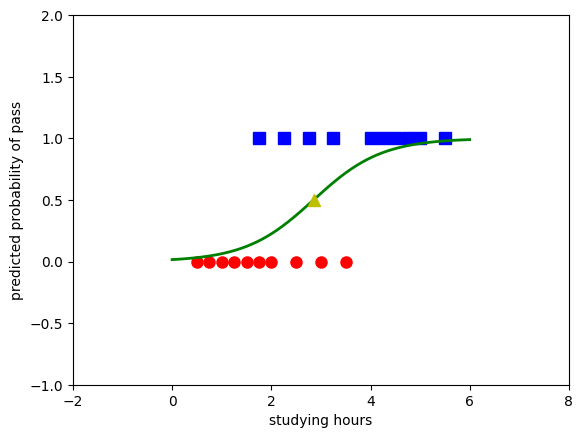

In [142]:
X0 = X[1, np.where(y == 0)][0]
y0 = y[np.where(y == 0)]
X1 = X[1, np.where(y == 1)][0]
y1 = y[np.where(y == 1)]

plt.plot(X0, y0, 'ro', markersize = 8)
plt.plot(X1, y1, 'bs', markersize = 8)

xx = np.linspace(0, 6, 1000)
w0 = w[-1][0][0]
w1 = w[-1][1][0]
threshold = -w0/w1
yy = sigmoid(w0 + w1*xx)
plt.axis([-2, 8, -1, 2])
plt.plot(xx, yy, 'g-', linewidth = 2)
plt.plot(threshold, .5, 'y^', markersize = 8)
plt.xlabel('studying hours')
plt.ylabel('predicted probability of pass')
plt.show()

In [144]:
# Hãy thực hiện lệnh để thu được bộ hệ số, quan sát kết quả chạy và dùng bộ hệ số thu được để chạy dự đoán cho kết
# quả thi của các sinh viên với số giờ học sau
X_test = np.array([2.45, 1.85, 3.75, 3.21, 4.05])
probs = sigmoid(w0 + w1 * X_test)
y_pred = [1 if logit >= 0.5 else 0 for logit in probs]
y_pred

[0, 0, 1, 1, 1]

- Kết quả của KNN là: 
  - k=3: [1. 0. 1. 0. 1.]
  - k=4: [1. 0. 1. 1. 1.]
  - k=5: [0. 0. 1. 0. 1.]

### VD B.2:

In [145]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
# generate list of data points
np.random.seed(22)
means = [[2, 2], [4, 2]]
cov = [[.7, 0], [0, .7]]
N = 20
X1 = np.random.multivariate_normal(means[0], cov, N)
X2 = np.random.multivariate_normal(means[1], cov, N)

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


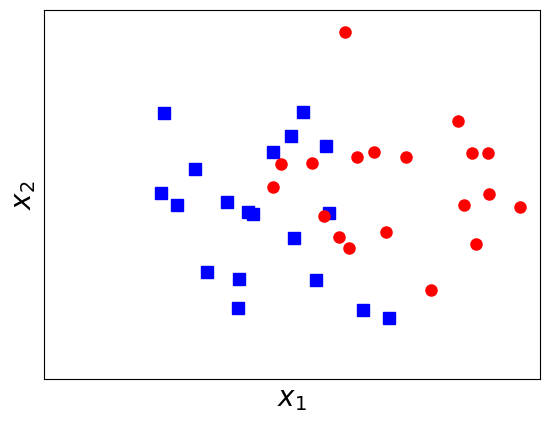

In [146]:
plt.plot(X1[:, 0], X1[:, 1], 'bs', markersize = 8, alpha = 1)
plt.plot(X2[:, 0], X2[:, 1], 'ro', markersize = 8, alpha = 1)
plt.axis('equal')
plt.ylim(0, 4)
plt.xlim(0, 5)
# hide tikcs
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])
plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
# save the figure to an image first
plt.savefig('logistic_2d.png', bbox_inches='tight', dpi = 300)
plt.show()

In [147]:
def sigmoid(s):
    return 1/(1 + np.exp(-s)) # calculate sigmoid function
def logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_count = 10000):
    w = [w_init]
    N = X.shape[1]
    d = X.shape[0]
    count = 0
    check_w_after = 20
    while count < max_count:
        # mix data for stochastic gradient descent method
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = y[i]
            zi = sigmoid(np.dot(w[-1].T, xi))
            w_new = w[-1] + eta*(yi - zi)*xi
            count += 1
            # stopping criteria
            if count%check_w_after == 0:
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    return w
            w.append(w_new)
    return w

In [149]:
X = np.concatenate((X1, X2), axis = 0).T
y = np.concatenate((np.zeros((1, N)), np.ones((1, N))), axis = 1).T
# Xbar
X = np.concatenate((np.ones((1, 2*N)), X), axis = 0)
eta = 0.05
d = X.shape[0]
w_init = np.random.randn(d, 1) # initialize parameters w = w_init
# call logistic_sigmoid_regression procedure
w = logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_count= 10000)
# print out the parameter
print(w[-1])

[[-9.40520562]
 [ 2.18391091]
 [ 1.392856  ]]


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


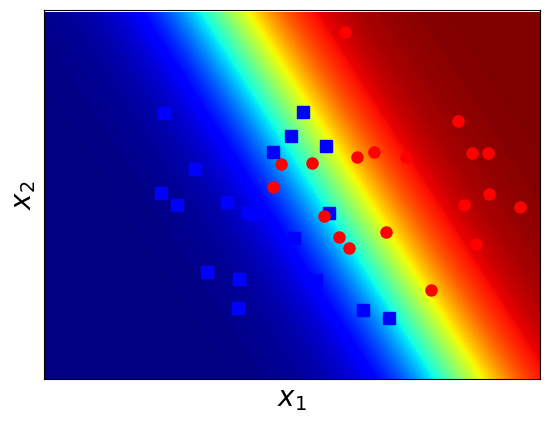

In [152]:
# Make data.
x1m = np.arange(-1, 6, 0.025) # generate data coord. X1
xlen = len(x1m)
x2m = np.arange(0, 4, 0.025) # generate data coord. X2
x2en = len(x2m)
x1m, x2m = np.meshgrid(x1m, x2m) # create mesh grid X = (X1, X2)
# now assign the parameter w0, w1, w2 from array w which was computed above
w0 = w[-1][0][0]
w1 = w[-1][1][0]
w2 = w[-1][2][0]
# calculate probability zm=P(c|x)=sigmoid(w^Tx)=sigmoid(w0+w1*x1m+w2*x2m)
zm = sigmoid(w0 + w1*x1m + w2*x2m)
X0 = X[:, np.where(y == 0)[0]]
X1 = X[:, np.where(y == 1)[0]]
# plot contour of prob. zm by the saturation of blue and red
# more red <=> prob. that data point belong to red class is higher & vise versa
CS = plt.contourf(x1m, x2m, zm, 200, cmap='jet')
# finally, plot the data and take a look
plt.plot(X0[1, :], X0[2, :], 'bs', markersize = 8, alpha = 1)
plt.plot(X1[1, :], X1[2, :], 'ro', markersize = 8, alpha = 1)
plt.axis('equal')
plt.ylim(0, 4)
plt.xlim(0, 5)
# hide tikcs
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])
plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.savefig('logistic_2d_2.png', bbox_inches='tight', dpi = 300)
plt.show()

### VD B.3:

#### a. Phân loại bằng phương pháp hồi quy Logistic

In [169]:
import pandas as pd

data = pd.read_csv('Admission_Predict.csv')
data['Label'] = np.where(data['Chance of Admit'] >= 0.75, 1, 0)
data.drop(['Serial No.', 'Chance of Admit'], inplace=True, axis=1)
names = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'Label']
data.columns = names
data.head()

,X1,X2,X3,X4,X5,X6,X7,Label
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


Train test split:

In [170]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
Xbar = X.copy()
Xbar.insert(0, 'X0', np.ones(len(Xbar)))

X_train, y_train = Xbar[:350].to_numpy(), y[:350].to_numpy()
X_test, y_test = Xbar[350:].to_numpy(), y[350:].to_numpy()

Fit model:

In [181]:
from sklearn.linear_model import LogisticRegression

np.random.seed(1)
log_reg = LogisticRegression(max_iter=10000).fit(X_train, y_train)

In [182]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

probs = log_reg.predict(X_test)
y_pred = np.zeros(len(X_test))
y_pred[probs >= 0.5] = 1
y_pred

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')

Accuracy: 0.9
Precision: 0.9473684210526315
Recall: 0.8181818181818182


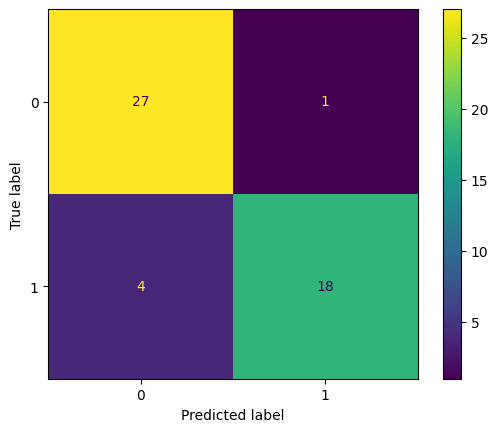

In [185]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

#### b. Bài tập thực hành: Dự đoán khả năng bằng hồi quy tuyến tính

In [186]:
import pandas as pd

data = pd.read_csv('Admission_Predict.csv')
data.drop(['Serial No.'], inplace=True, axis=1)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


Train test split:

In [197]:
X_train, y_train = data.iloc[:350, :-1], data.iloc[:350, -1]
X_test, y_test = data.iloc[350:, :-1], data.iloc[350:, -1]

Fit model:

In [194]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_train, y_train)

LinearRegression()

Evaluate:

In [195]:

y_pred = lin_reg.predict(X_test)
mse = np.mean((y_test - y_pred)**2)
print(f'MSE: {mse}')

MSE: 0.004641678440367148


#### c. Bài tập tự thực hành: Hãy sử dụng phương pháp Naïve Bayes phù hợp để phân loại dữ liệu nói trên. Tìm hiểu và sử dụng hàm đo thời gian để tính

In [240]:
import pandas as pd

data = pd.read_csv('Admission_Predict.csv')
data['Label'] = np.where(data['Chance of Admit'] >= 0.75, 1, 0)
data.drop(['Serial No.', 'Chance of Admit'], inplace=True, axis=1)
names = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'Label']
data.columns = names
data.head()

,X1,X2,X3,X4,X5,X6,X7,Label
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


In [241]:
X_train, y_train = data.iloc[:350, :-1], data.iloc[:350, -1]
X_test, y_test = data.iloc[350:, :-1], data.iloc[350:, -1]

Gaussian Naive Bayes:

In [244]:
from sklearn.naive_bayes import GaussianNB
import time

start_time = time.perf_counter()
gaussianNB = GaussianNB(priors=None).fit(X_train, y_train)
end_time = time.perf_counter()
print(f'Execution time: {end_time - start_time}')

Execution time: 0.0025718999095261097


Logistics regression:

In [251]:
from sklearn.linear_model import LogisticRegression
import time

start_time = time.perf_counter()
log_reg = LogisticRegression(max_iter=10000).fit(X_train, y_train)
end_time = time.perf_counter()
print(f'Execution time: {end_time - start_time}')

Execution time: 0.08272480010055006


Evaluate:

In [252]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# gaussian nb
gauss_pred = gaussianNB.predict(X_test)
print('Gaussian Naive Bayes:')
print(f'Accuracy: {accuracy_score(y_test, gauss_pred)}')
print(f'Precision: {precision_score(y_test, gauss_pred)}')
print(f'Recall: {recall_score(y_test, gauss_pred)}')
print('\n')

# logistics regression
log_pred = log_reg.predict(X_test)
print('Logistics regression:')
print(f'Accuracy: {accuracy_score(y_test, log_pred)}')
print(f'Precision: {precision_score(y_test, log_pred)}')
print(f'Recall: {recall_score(y_test, log_pred)}')

Gaussian Naive Bayes:
Accuracy: 0.9
Precision: 0.9473684210526315
Recall: 0.8181818181818182


Logistics regression:
Accuracy: 0.9
Precision: 0.9473684210526315
Recall: 0.8181818181818182


### VD B.4:

In [263]:
import pandas as pd
# change to your data's path
data=pd.read_csv('banking.csv')

# yes/no attributes
# data['default'] = np.where(data['default'] == 'yes', 1, 0)
# data['loan'] = np.where(data['loan'] == 'yes', 1, 0)
# data['deposit'] = np.where(data['deposit'] == 'yes', 1, 0)

# day of week attributes
# dict_month = {
#     'jan' : 1, 'feb' : 2, 'mar' : 3, 'apr' : 4, 'may' : 5, 'jun' : 6, 
#     'jul' : 7, 'aug' : 8, 'sep' : 9, 'oct' : 10, 'nov' : 11, 'dec' : 12
# }
# data['month'] = data['month'].map(dict_month)

data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0
